In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

In [25]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)


,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [27]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [29]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


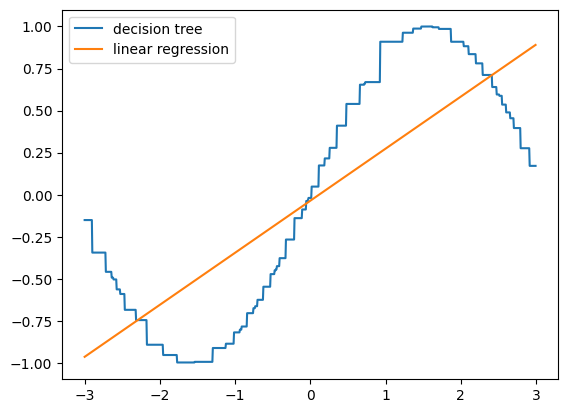

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Sample data
X = np.random.rand(100, 1) * 6 - 3
y = np.sin(X).ravel()

# Prediction line
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# Decision tree model
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

# Linear regression model
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.legend()
plt.show()


In [43]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [45]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[ 2.62314803]
 [-1.88394696]
 [-2.99059174]
 [-2.04716597]
 [-0.45954646]]

Bin membership for data points:
 [[10]
 [ 2]
 [ 1]
 [ 2]
 [ 5]]


In [49]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample input
which_bin = np.array([[0], [1], [2], [1]])

# Initialize encoder with updated parameter
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform
encoded = encoder.fit_transform(which_bin)
print(encoded)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [53]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Sample data
X = np.random.rand(10, 1) * 10

# Apply binning
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_binned = kbd.fit_transform(X)

print("X_binned.shape: {}".format(X_binned.shape))


X_binned.shape: (10, 1)


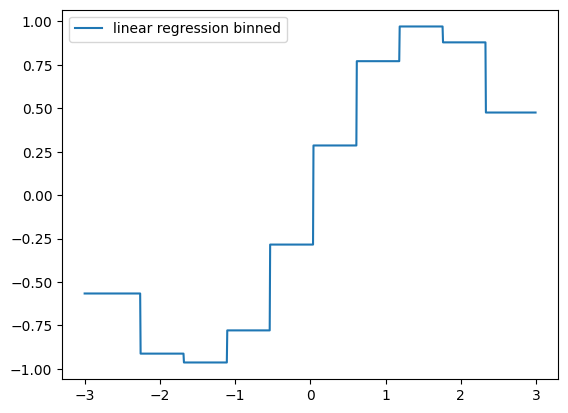

In [59]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 1. Data
X = np.random.rand(100, 1) * 6 - 3
y = np.sin(X).ravel()

# 2. Binning the data
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_binned = kbd.fit_transform(X)

# 3. One-hot encoding the binned data
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_binned)

# 4. Fit model
reg = LinearRegression().fit(X_encoded, y)

# 5. Create line for prediction
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = kbd.transform(line)
line_encoded = encoder.transform(line_binned)

# 6. Plot
plt.plot(line, reg.predict(line_encoded), label='linear regression binned')
plt.legend()
plt.show()


In [61]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)


(100, 2)


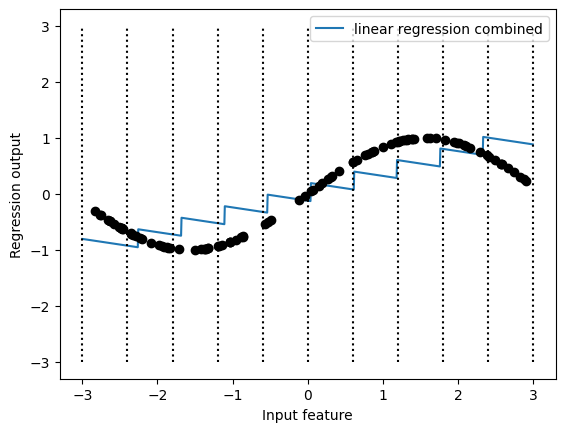

In [63]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [65]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)


(100, 2)


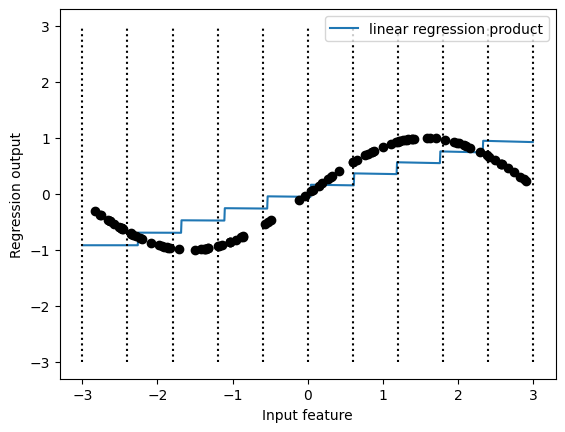

In [67]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
 plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


In [69]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [71]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [73]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[ 2.57939758]
 [-2.51457297]
 [ 0.14506026]
 [ 2.10785489]
 [ 1.23351761]]
Entries of X_poly:
[[ 2.57939758e+00  6.65329190e+00  1.71614851e+01  4.42662931e+01
   1.14180370e+02  2.94516569e+02  7.59675328e+02  1.95950471e+03
   5.05434170e+03  1.30371568e+04]
 [-2.51457297e+00  6.32307721e+00 -1.58998390e+01  3.99813054e+01
  -1.00535910e+02  2.52804881e+02 -6.35696318e+02  1.59850478e+03
  -4.01955690e+03  1.01074691e+04]
 [ 1.45060265e-01  2.10424805e-02  3.05242779e-03  4.42785984e-04
   6.42306521e-05  9.31731541e-06  1.35157224e-06  1.96059427e-07
   2.84404325e-08  4.12557667e-09]
 [ 2.10785489e+00  4.44305224e+00  9.36530940e+00  1.97407132e+01
   4.16105589e+01  8.77090201e+01  1.84877887e+02  3.89695758e+02
   8.21422110e+02  1.73143861e+03]
 [ 1.23351761e+00  1.52156571e+00  1.87687810e+00  2.31516220e+00
   2.85579335e+00  3.52267140e+00  4.34527723e+00  5.35997600e+00
   6.61162481e+00  8.15555566e+00]]


In [77]:
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = [[2, 3]]

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Get feature names
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out(['x1', 'x2'])))


Polynomial feature names:
['1' 'x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.random.rand(100, 1) * 6 - 3   # Shape (100, 1)
y = np.sin(X).ravel()               # Shape (100,)

# 1. Generate polynomial features for full X
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# 2. Fit model
reg = LinearRegression().fit(X_poly, y)

# 3. Create prediction line
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
line_poly = poly.transform(line)

# 4. Plot
plt.scatter(X, y, s=10)
plt.plot(line, reg.predict(line_poly), label='polynomial regression', color='r')
plt.legend()
plt.show()
